# The Dataset: CIFAR 10

In [187]:
import numpy as np
import pandas as pd

In [188]:
import matplotlib.pyplot as plt

In [189]:
import tensorflow as tf

cifar10 = tf.keras.datasets.cifar10
(xtrain, ytrain), (xtest, ytest) = cifar10.load_data()

In [190]:
print('training set:', xtrain.shape)
print('training labels:', ytrain.shape)
print('test set:', xtest.shape)
print('test labels:', ytest.shape)

training set: (50000, 32, 32, 3)
training labels: (50000, 1)
test set: (10000, 32, 32, 3)
test labels: (10000, 1)


In [191]:
ytrain = ytrain.flatten()
ytest = ytest.flatten()

In [192]:
print(ytrain.shape)
print(ytest.shape)

(50000,)
(10000,)


## Visualize the Data

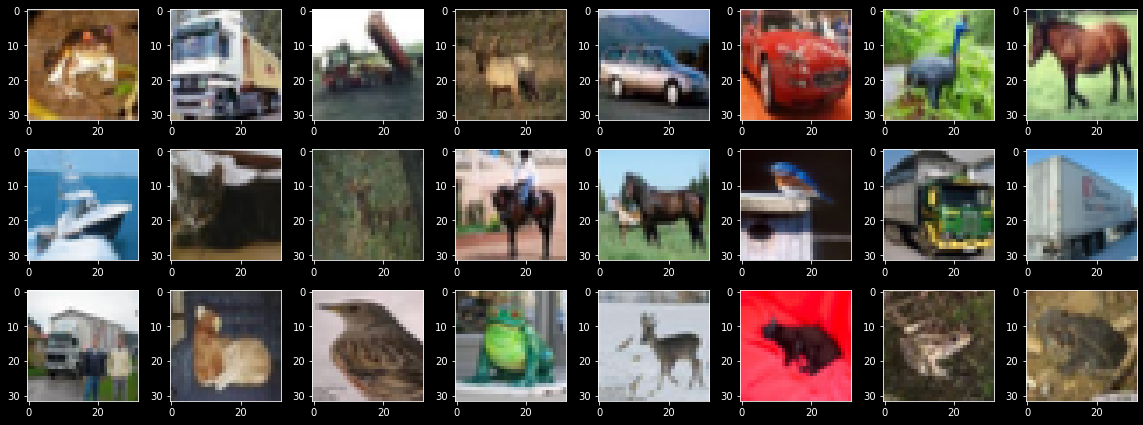

In [193]:
rows=3
cols=8

count = 0
fig,ax = plt.subplots(figsize=(16,6), nrows=rows, ncols=cols)
for i in range(rows):
    for j in range(cols):
        ax[i,j].imshow(xtrain[count])
        count += 1

plt.tight_layout()
plt.show()

In [194]:
sorted(pd.Series(ytrain.reshape(1,-1)[0]).unique())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

The dataset suggests 10 different categories of images from 0 to 9.

Previous knowledge of the dataset suggests the following labels:
- airplane
- automobile
- bird
- cat
- deer
- dog
- frog
- horse
- ship
- truck

How do these labels track with the training set labels?

In [195]:
classes = ['airplane',
           'automobile',
           'bird',
           'cat',
           'deer',
           'dog',
           'frog',
           'horse',
           'ship',
           'truck']

len(classes)

10

In [196]:
first_classes = []
for label in ytrain[:rows*cols]:
    first_classes.append(classes[label])
    
first_classes

['frog',
 'truck',
 'truck',
 'deer',
 'automobile',
 'automobile',
 'bird',
 'horse',
 'ship',
 'cat',
 'deer',
 'horse',
 'horse',
 'bird',
 'truck',
 'truck',
 'truck',
 'cat',
 'bird',
 'frog',
 'deer',
 'cat',
 'frog',
 'frog']

The labels match. We can use this later to convert the numerical classifications of our predicted images to useful labels.

## Normalize the Data

In [197]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import utils
from tensorflow.keras import optimizers

### Min/Max Scaling Using Light Value Range (0, 255)

In [198]:
n,h,w,c = xtrain.shape
xtrain_scaled = xtrain/255

In [199]:
n,h,w,c = xtest.shape
xtest_scaled = xtest/255

In [200]:
print(xtrain_scaled.shape)
print(xtest_scaled.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


### Encode `y` Labels

In [201]:
# ytrain_encoded = utils.to_categorical(ytrain, len(classes))
# ytest_encoded = utils.to_categorical(ytest, len(classes))

In [202]:
# print(ytrain_encoded.shape)
# print(ytest_encoded.shape)

## Build the Model

In [203]:
n,h,w,c = xtrain_scaled.shape

In [260]:
network = models.Sequential()
opt = optimizers.Adam(learning_rate=0.01)

network.add(layers.Conv2D(
    filters=32,
    kernel_size=3,
    strides=1,
    padding='same',
    data_format='channels_last',
    use_bias=True,
    input_shape=(h, w, c),
    activation='relu',
    kernel_initializer='random_normal',
    bias_initializer='zeros'
))

network.add(layers.BatchNormalization())

network.add(layers.Conv2D(
    filters=32,
    kernel_size=3,
    strides=1,
    padding='same',
    data_format='channels_last',
    use_bias=True,
    input_shape=(h, w, c),
    activation='relu',
    kernel_initializer='random_normal',
    bias_initializer='zeros'
))

network.add(layers.BatchNormalization())

network.add(layers.MaxPool2D(
    pool_size=2,
    padding='same',
    data_format='channels_last'
))

network.add(layers.Dropout(rate=.3))

network.add(layers.Conv2D(
    filters=64,
    kernel_size=3,
    strides=1,
    padding='same',
    data_format='channels_last',
    use_bias=True,
    input_shape=(h, w, c),
    activation='relu',
    kernel_initializer='random_normal',
    bias_initializer='zeros'
))

network.add(layers.BatchNormalization())

network.add(layers.Conv2D(
    filters=64,
    kernel_size=3,
    strides=1,
    padding='same',
    data_format='channels_last',
    use_bias=True,
    input_shape=(h, w, c),
    activation='relu',
    kernel_initializer='random_normal',
    bias_initializer='zeros'
))

network.add(layers.BatchNormalization())

network.add(layers.MaxPool2D(
    pool_size=2,
    padding='same',
    data_format='channels_last'
))

network.add(layers.Dropout(rate=.3))

network.add(layers.Conv2D(
    filters=128,
    kernel_size=3,
    strides=1,
    padding='same',
    data_format='channels_last',
    use_bias=True,
    input_shape=(h, w, c),
    activation='relu',
    kernel_initializer='random_normal',
    bias_initializer='zeros'
))

network.add(layers.BatchNormalization())

network.add(layers.Conv2D(
    filters=128,
    kernel_size=3,
    strides=1,
    padding='same',
    data_format='channels_last',
    use_bias=True,
    input_shape=(h, w, c),
    activation='relu',
    kernel_initializer='random_normal',
    bias_initializer='zeros'
))

network.add(layers.BatchNormalization())

network.add(layers.MaxPool2D(
    pool_size=2,
    padding='same',
    data_format='channels_last'
))

network.add(layers.Dropout(rate=.3))

network.add(layers.Flatten())

network.add(layers.Dense(
    units=1024,
    activation='relu',
    kernel_initializer='random_normal',
    bias_initializer='zeros'
))

network.add(layers.Dense(
    units=10,
    activation='softmax'
))

network.compile(
    optimizer=opt,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [261]:
network.summary()

Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_115 (Conv2D)         (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_96 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_116 (Conv2D)         (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_97 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_111 (MaxPooli  (None, 16, 16, 32)       0         
 ng2D)                                                           
                                                     

In [262]:
history = network.fit(
    xtrain_scaled,
    ytrain,
    steps_per_epoch=50, # this determines the sample batch size for each epoch, in this case: 50,000/50 = 1000
    epochs=10,
    validation_data=(xtest_scaled, ytest),
    use_multiprocessing=True)

Epoch 1/10
50/50 [==============================] - 47s 923ms/step - loss: 12.5856 - accuracy: 0.1879 - val_loss: 365.9359 - val_accuracy: 0.1000
Epoch 2/10
50/50 [==============================] - 47s 934ms/step - loss: 1.9808 - accuracy: 0.3053 - val_loss: 85.4103 - val_accuracy: 0.1513
Epoch 3/10
50/50 [==============================] - 46s 923ms/step - loss: 1.7082 - accuracy: 0.3715 - val_loss: 24.3421 - val_accuracy: 0.1012
Epoch 4/10
50/50 [==============================] - 46s 931ms/step - loss: 1.5988 - accuracy: 0.4156 - val_loss: 4.5584 - val_accuracy: 0.1314
Epoch 5/10
50/50 [==============================] - 46s 917ms/step - loss: 1.5249 - accuracy: 0.4387 - val_loss: 2.8684 - val_accuracy: 0.1544
Epoch 6/10
50/50 [==============================] - 46s 913ms/step - loss: 1.4651 - accuracy: 0.4621 - val_loss: 2.9071 - val_accuracy: 0.1739
Epoch 7/10
50/50 [==============================] - 46s 919ms/step - loss: 1.4180 - accuracy: 0.4768 - val_loss: 2.6283 - val_accuracy: 0